<a href="https://colab.research.google.com/github/smruthyunjaya05/MLE/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [2]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
# Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

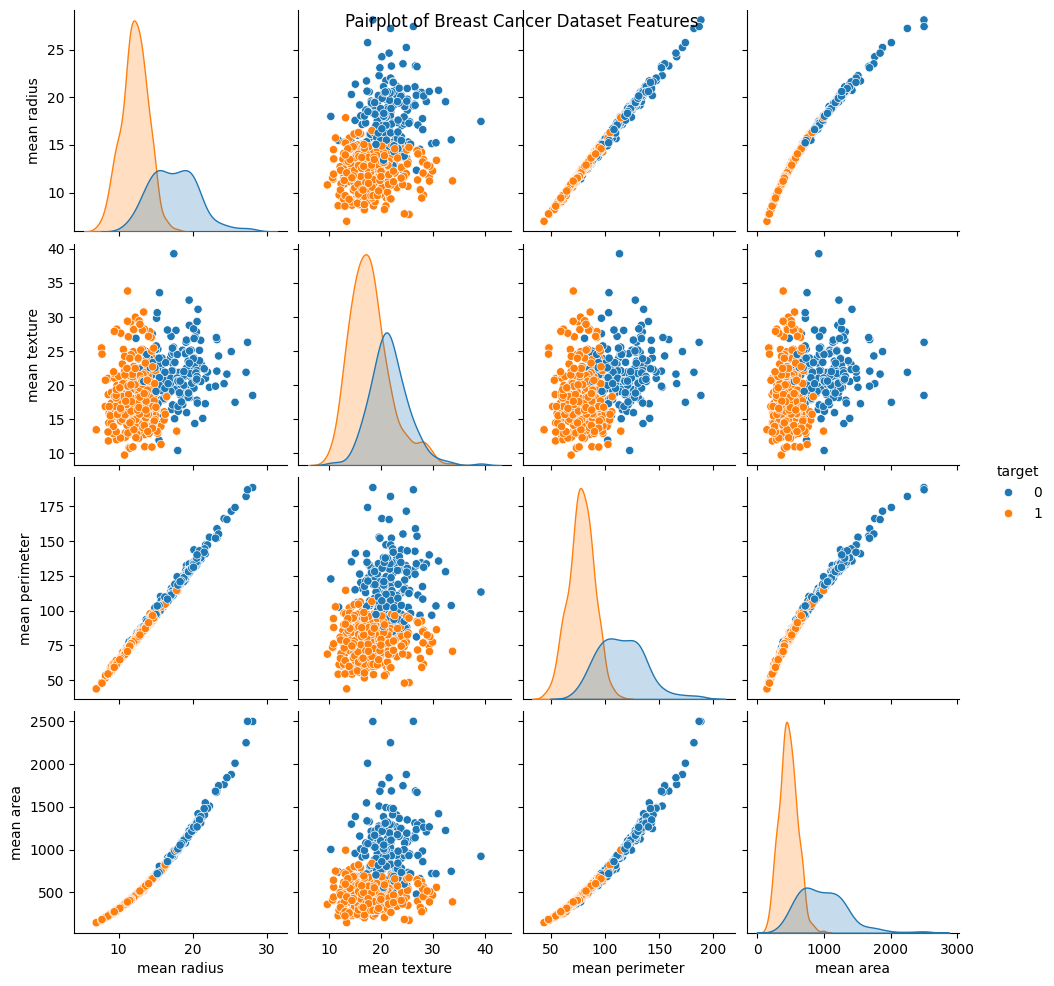

In [4]:
# Pairplot of the dataset (taking a subset of features for better visualization)
sns.pairplot(df.iloc[:, [0, 1, 2, 3, -1]], hue='target')
plt.suptitle('Pairplot of Breast Cancer Dataset Features')
plt.show()

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)


In [6]:
# Train the SVM model
clf = SVC(kernel='linear', C=3)
clf.fit(X_train, y_train)

SVC(C=3, kernel='linear')

In [7]:
# Make predictions
y_pred = clf.predict(X_test)

In [8]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)


In [9]:
print(f"SVM Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

SVM Accuracy: 0.96
Confusion Matrix:
[[36  3]
 [ 1 74]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.92      0.95        39
           1       0.96      0.99      0.97        75

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [11]:
# Create a DataFrame for display
results = {'Algorithm': 'SVM', 'Accuracy': accuracy}
df_results = pd.DataFrame([results])

In [12]:
# Print the results DataFrame
print(df_results)

  Algorithm  Accuracy
0       SVM  0.964912


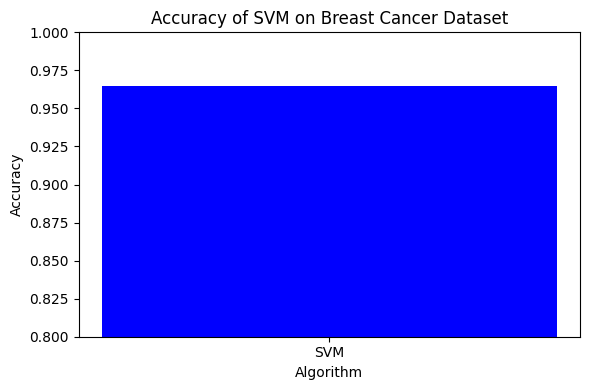

In [13]:
# Plotting the results
plt.figure(figsize=(6, 4))
plt.bar(df_results['Algorithm'], df_results['Accuracy'], color='blue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of SVM on Breast Cancer Dataset')
plt.ylim(0.8, 1.0)  # Set y-axis limits for better visualization
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

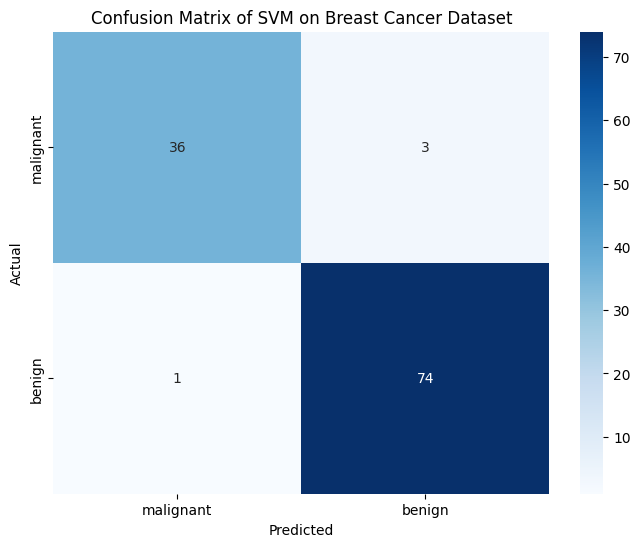

In [14]:
# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of SVM on Breast Cancer Dataset')
plt.show()


In [15]:
# Applying PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [16]:
# Splitting the PCA transformed data for visualization
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=23)


In [17]:
# Train the SVM model on PCA transformed data
clf_pca = SVC(kernel='linear', C=3)
clf_pca.fit(X_train_pca, y_train_pca)


SVC(C=3, kernel='linear')

In [18]:
# Make predictions on PCA transformed test data
y_pred_pca = clf_pca.predict(X_test_pca)

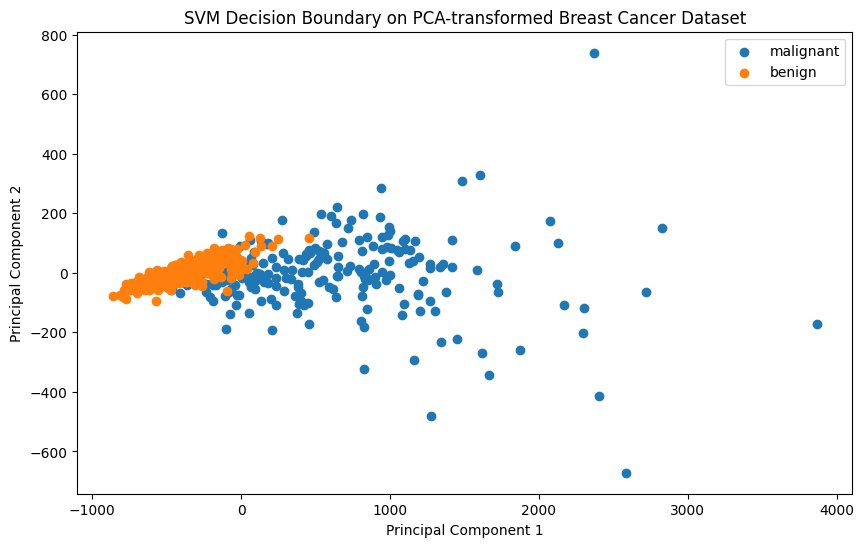

In [19]:
# Plotting the decision boundaries
plt.figure(figsize=(10, 6))
for i, target_name in enumerate(data.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary on PCA-transformed Breast Cancer Dataset')
plt.legend()
plt.show()